# Table of Contents<br>
Linear Regression:<br>
    Files needed for this exercise<br>
    Before you begin<br>
1. A simple MATLAB function<br>
    1.1 Submitting Solutions<br>
2. Linear regression with one variable<br>
    2.1 Plotting the data<br>
    2.2 Gradient Descent<br>
        2.2.1 Update Equations<br>
        2.2.2 Implementation<br>
        2.2.3 Computing the cost<br>
        2.2.4 Gradient descent<br>
    2.3 Debugging<br>
    2.4 Visualizing<br>
    
Optional Exercises:<br>
3. Linear regression with multiple variables<br>
    3.1 Feature Normalization<br>
    3.2 Gradient Descent<br>
        3.2.1 Optional (ungraded) exercise: Selecting learning rates<br>
    3.3 Normal Equations<br>

# Linear Regression

## 1. A simple MATLAB function<br>
The first part of this script gives you practice with MATLAB syntax and the homework submission process. In the file warmUpExercise.m, you will find the outline of a MATLAB function. Modify it to return a 5 x 5 identity matrix by filling in the following code:<br>

  A = eye(5);<br>
  
    When you are finished, save warmUpExercise.m, then run the code contained in this section to call warmUpExercise().<br>
    
    5x5 Identity Matrix:<br>

In [49]:
import numpy as np
def warmUpExercise(n):
    imatrix = np.identity(n)
    return imatrix

In [50]:
imatrix = warmUpExercise(5)
print(imatrix)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## 2. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. This script has already been set up to load this data for you.

### 2.1 Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.
Run the code below to load the dataset from the data file into the variables X and y:

In [51]:
def plotData(X, y):
    plt.figure()
    plt.plot(X,y,'x',linewidth=0)
    plt.title('Profit vs. Population')
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s') 

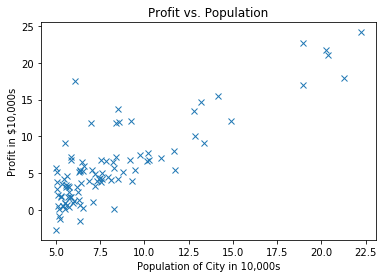

In [52]:
data = genfromtxt('ex1data1.txt', delimiter=',') # read comma separated data
X=data[:,0]
y=data[:,1]
plotData(X, y)

### 2.2 Gradient Descent<br>

In this section, you will fit the linear regression parameters to our dataset using gradient descent.

#### 2.2.1 Update Equations<br>

The objective of linear regression is to minimize the cost function


In [53]:
from IPython.display import display, Math, Latex
display(Math(r'$$\frac{1}{2m}\sum_{m=1}^{\infty} (h_\theta(x^{(i)})-y^{(i)})^{2}$$'))

<IPython.core.display.Math object>

where the hypothesis  is given by the linear model

In [54]:
from IPython.display import display, Math, Latex
display(Math(r'$$h_\theta(x)=\theta^{T}x=\theta_0+\theta_1x_1$$'))

<IPython.core.display.Math object>

Recall that the parameters of your model are the  values. These are the values you will adjust to minimize cost . One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

With each step of gradient descent, your parameters  come closer to the optimal values that will achieve the lowest cost .

**Implementation Note:** We store each example as a row in the the X matrix in MATLAB. To take into account the intercept term (), we add an additional first column to X and set it to all ones. This allows us to treat  as simply another 'feature'.

### 2.2.2 Implementation<br>
In this script, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the  intercept term. Run the code below to initialize the parameters to 0 and the learning rate alpha to 0.01. 

In [56]:
m = len(X)
print(m)

97


In [74]:
X_ii = np.column_stack((np.ones(m), X)) # Add a column of ones to x
theta = [0, 0] # initialize fitting parameters
iterations = 1500;
alpha = 0.01;
print(X_ii[:5, :2])
print("...")
print(theta)
print(iterations)
print(alpha)

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]
...
[0, 0]
1500
0.01


#### 2.2.3 Computing the cost 
As you perform gradient descent to minimize the cost function , it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  so you can check the convergence of your gradient descent implementation.
    Your next task is to complete the code in the file computeCost.m, which is a function that computes . As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.
    Once you have completed the function definition, run this section. The code below will call computeCost once using  initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07.

In [82]:
def computeCost(X_ii, y, theta):
    m = len(y)
    J = 0
      
    Hx = X_ii.dot(theta)
    J = sum((Hx-y)**2)/(2*m)
    
    return J

In [85]:
# Compute and display initial cost
computeCost(X_ii, y, theta)

32.072733877455654

#### 2.2.4 Gradient descent
Next, you will implement gradient descent in the file gradientDescent.m. The loop structure has been written for you, and you only need to supply the updates to  within each iteration.
    As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost  is parameterized by the vector , not  and . That is, we minimize the value of  by changing the values of the vector , not by changing  or . Refer to the equations given earlier and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look at the value of J and check that it is decreasing with each step. The starter code for gradientDescent.m calls computeCost on every iteration and prints the cost. Assuming you have implemented gradient descent and computeCost correctly, your value of  should never increase, and should converge to a steady value by the end of the algorithm.
    After you are finished, run this execute this section. The code below will use your final parameters to plot the linear fit. The result should look something like Figure 2 below:

In [86]:
def gradientDescent(X_ii, y, theta, alpha, num_iters):

    m = len(y)
    J_history = np.zeros(num_iters)
    
    for iter in range(0, len(J_history)):
        
        theta = theta - (alpha * (X_ii.transpose() * ((X_ii.dot(theta)-y)/m))).sum(axis = 1)
        
        J_history[iter] = computeCost(X_ii, y, theta)  
    
    return [theta, J_history]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


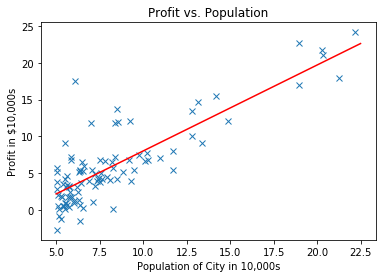

theta =  [-3.63029144  1.16636235]


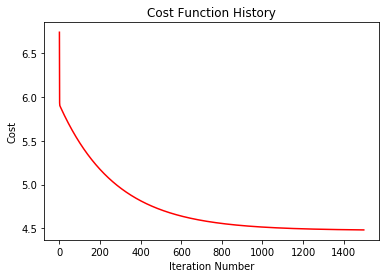

J_history =  [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


In [87]:
from numpy import genfromtxt, ones
import numpy as np
from matplotlib import pyplot as plt

def main():
    
    data = genfromtxt('ex1data1.txt', delimiter=',')
    X=data[:,0]
    y=data[:,1]
    theta = [0, 0]
    num_iters = 1500
    alpha = 0.01
    m = len(y)
    X_ii = np.column_stack((np.ones(m), X))
    J_historyX = list(range(0, 1500))
    
    plt.figure()
    plt.plot(X,y,'x',linewidth=0)
    plt.title('Profit vs. Population')
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    
    theta, J_history = gradientDescent(X_ii, y, theta, alpha, num_iters)
     
    x = np.linspace(5,22.5,2.5)
    y = x*theta[1]+theta[0]
    plt.plot(x, y, '-r', label='y=2x+1')
    plt.show()
    print("theta = ", theta)
       
    plt.figure()
    plt.plot(J_historyX, J_history,'r-')
    plt.title('Cost Function History')
    plt.xlabel('Iteration Number')
    plt.ylabel('Cost')
    plt.show()
    print("J_history = " , J_history)
    
if __name__ == '__main__':
    main()